In [ ]:
import glob
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, io, filters, exposure, util

## Access of Photos

In [46]:
# croping fucntion crops the images to the section of the gap of the entire image
filenames = glob.glob('Knees/*.png', recursive = True)
print(filenames[:5])


['Knees/SevereG4 (1).png', 'Knees/DoubtfulG1 (1).png', 'Knees/NormalG0 (1).png', 'Knees/ModerateG3 (1).png', 'Knees/MildG2 (1).png']


In [47]:
filenames

['Knees/SevereG4 (1).png',
 'Knees/DoubtfulG1 (1).png',
 'Knees/NormalG0 (1).png',
 'Knees/ModerateG3 (1).png',
 'Knees/MildG2 (1).png']

## Opening Image and Cropping it

In [48]:
img = io.imread(filenames[1])
img

array([[[8, 8, 8],
        [9, 9, 9],
        [9, 9, 9],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[8, 8, 8],
        [9, 9, 9],
        [9, 9, 9],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[8, 8, 8],
        [9, 9, 9],
        [9, 9, 9],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[2, 2, 2],
        [3, 3, 3],
        [6, 6, 6],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [3, 3, 3],
        [6, 6, 6],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [3, 3, 3],
        [6, 6, 6],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

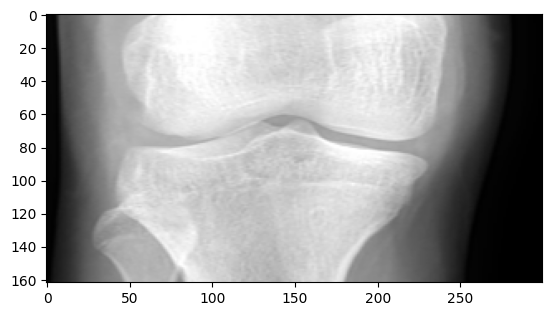

In [49]:
plt.imshow(img)
plt.show()

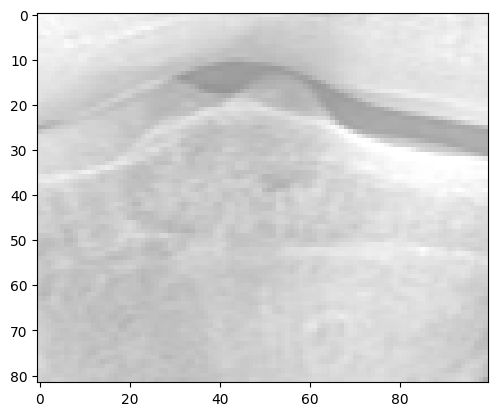

In [ ]:
#(a, b) --> (from the top, from the bottom)
#(c, d) --> (from the left, from the right)
#(0, 0) --> (keep all color info intact)
B = util.crop(img, ((50, 30), (100, 100), (0,0)), copy=False)
plt.imshow(B)
plt.show()

## Converting the Image from Gray to RBG 

In [ ]:
#since the image had rgb values, converting the image to gray will allow hisotrgam equalization
gray= color.rgb2gray(B)
print(gray.shape) #to check if it turned gray, the shape must have two values 

(82, 100)


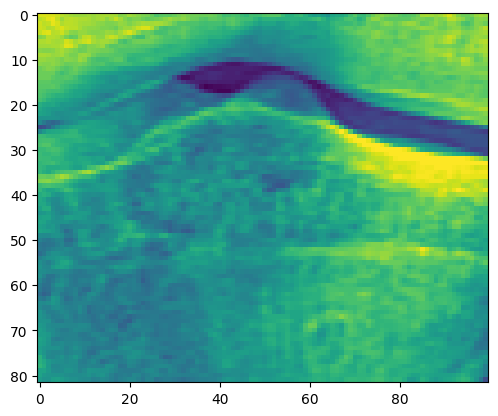

In [52]:
plt.imshow(gray)
plt.show()

## Histogram Equalization Process

In [53]:
# histogram equalization - image processing of contrast adjustment using the image's histograme
equalized = exposure.equalize_hist(gray)
print(equalized)

[[0.98195122 0.98195122 0.98195122 ... 0.94295361 0.95314281 0.94963415]
 [0.9704878  0.97492022 0.98326191 ... 0.9210514  0.93158537 0.9210514 ]
 [0.97780488 0.9704878  0.97167939 ... 0.9210514  0.91621951 0.88902439]
 ...
 [0.54860497 0.54860497 0.46390244 ... 0.44220082 0.34804878 0.17774846]
 [0.54860497 0.46390244 0.42365854 ... 0.44220082 0.34804878 0.16560976]
 [0.47941019 0.39817073 0.39817073 ... 0.39817073 0.12353659 0.04004958]]


In [59]:
equalized

array([[0.98195122, 0.98195122, 0.98195122, ..., 0.94295361, 0.95314281,
        0.94963415],
       [0.9704878 , 0.97492022, 0.98326191, ..., 0.9210514 , 0.93158537,
        0.9210514 ],
       [0.97780488, 0.9704878 , 0.97167939, ..., 0.9210514 , 0.91621951,
        0.88902439],
       ...,
       [0.54860497, 0.54860497, 0.46390244, ..., 0.44220082, 0.34804878,
        0.17774846],
       [0.54860497, 0.46390244, 0.42365854, ..., 0.44220082, 0.34804878,
        0.16560976],
       [0.47941019, 0.39817073, 0.39817073, ..., 0.39817073, 0.12353659,
        0.04004958]])

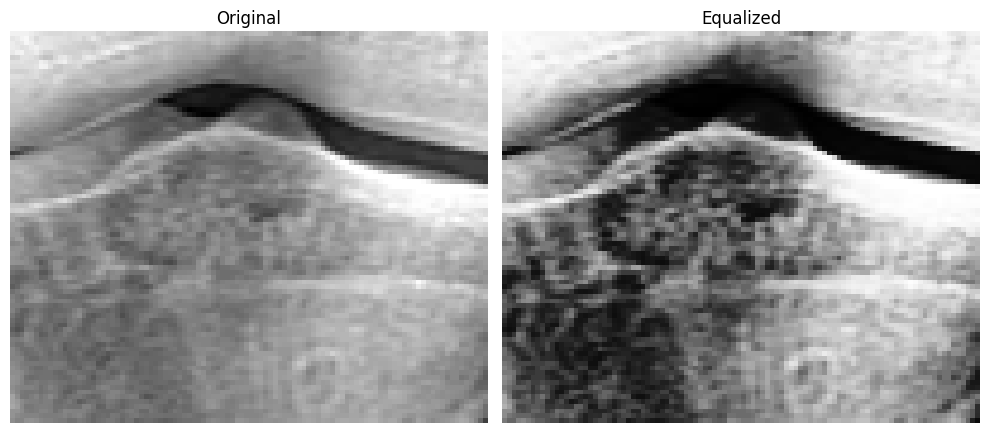

In [54]:
#comparison of the original and equalized image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(equalized, cmap='gray')
ax[1].set_title("Equalized")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

## Creating Histogram Graphs

In [55]:
#collecting the data points from the equalizated image to create a histogram
equ_image = util.img_as_ubyte(equalized)
hist, hist_center = exposure.histogram(equ_image, nbins=256)

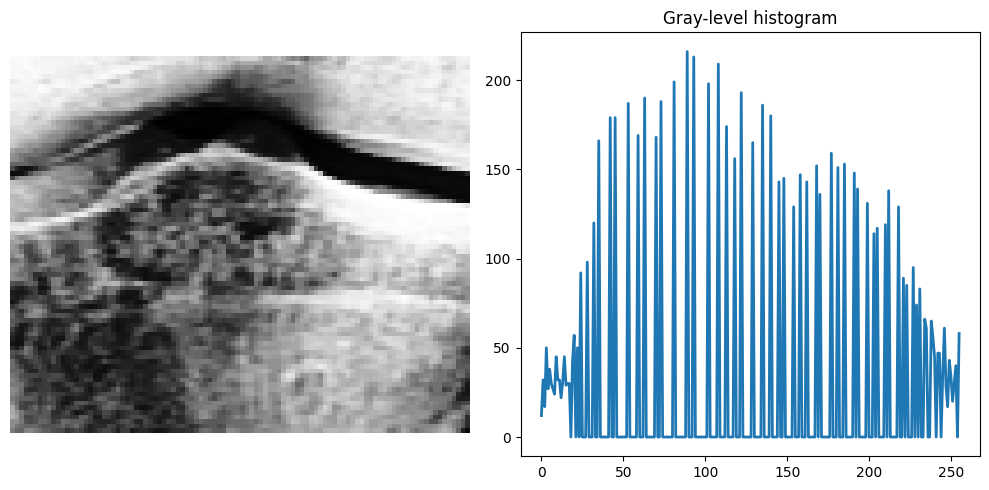

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(equ_image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].plot(hist_center, hist, lw=2)
ax[1].set_title('Gray-level histogram')

fig.tight_layout()

## Removing Noise to Get Better Data points
Looking that the equalized image, there can be some inaccuracy due to the dark shades on the bone. And since we're focusing on the gap, we want to remove those dark shades of the images.